# Filters and Edge Detection.
Following: 
1. https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html
2. https://pyimagesearch.com/2021/04/28/opencv-smoothing-and-blurring/
3. https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html


Acknowlegement: Image by Tomascastelazo, CC BY-SA 3.0 <https://creativecommons.org/licenses/by-sa/3.0>, via Wikimedia Commons

In [17]:
%pip install matplotlib
%pip install opencv-python
%pip install numpy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\eli20\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\eli20\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\eli20\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import sys
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
## Function to display image using Matplotlib
def display_image(image1, strng):
    image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB) ##BGR to RGB conversion for display using Matplotlib
    plt.title(strng)
    plt.imshow(image)
    plt.show()


## Read Image

In [4]:
img = cv2.imread("fish.jpg") 
display_image(img, "Original Image")

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


## Blurring Image

In [7]:
img = cv2.GaussianBlur(img, (3, 3), 0) # Adding Gaussian Blur with 3 x 3 filter size
display_image(img, "After Gaussian Blur")

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\smooth.dispatch.cpp:618: error: (-215:Assertion failed) !_src.empty() in function 'cv::GaussianBlur'


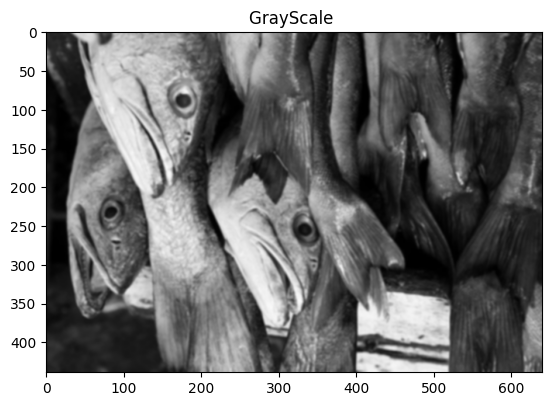

In [33]:
src_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display_image(src_gray, "GrayScale ")

## Define Variables

In [ ]:
ddepth = cv2.CV_16S  ## To prevent overflow
kernel_size = 3


## Laplacian Operator

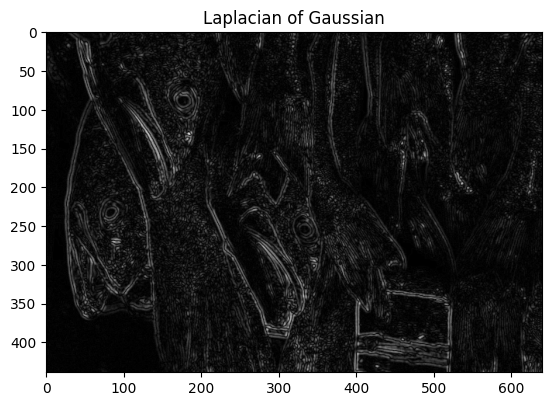

In [37]:
dst = cv2.Laplacian(src_gray, ddepth, ksize=kernel_size)
abs_dst = cv2.convertScaleAbs(dst)
display_image(abs_dst, "Laplacian of Gaussian")

## Sobel Filter

In [ ]:
scale = 1
delta = 0

In [46]:
grad_x = cv2.Sobel(src_gray, ddepth, 1, 0, ksize=kernel_size, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(src_gray, ddepth, 0, 1, ksize=kernel_size, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

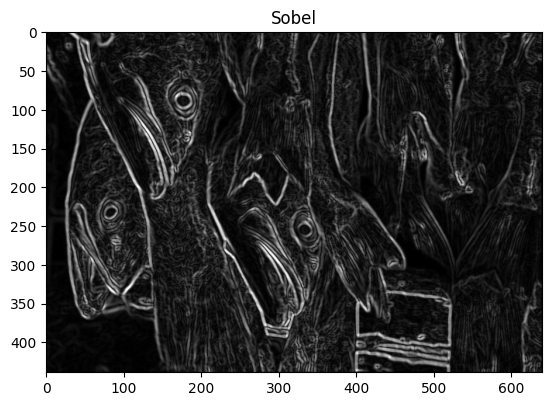

In [48]:
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0) ## approximating gradient
display_image(grad, "Sobel")